In [1]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(8,8)})

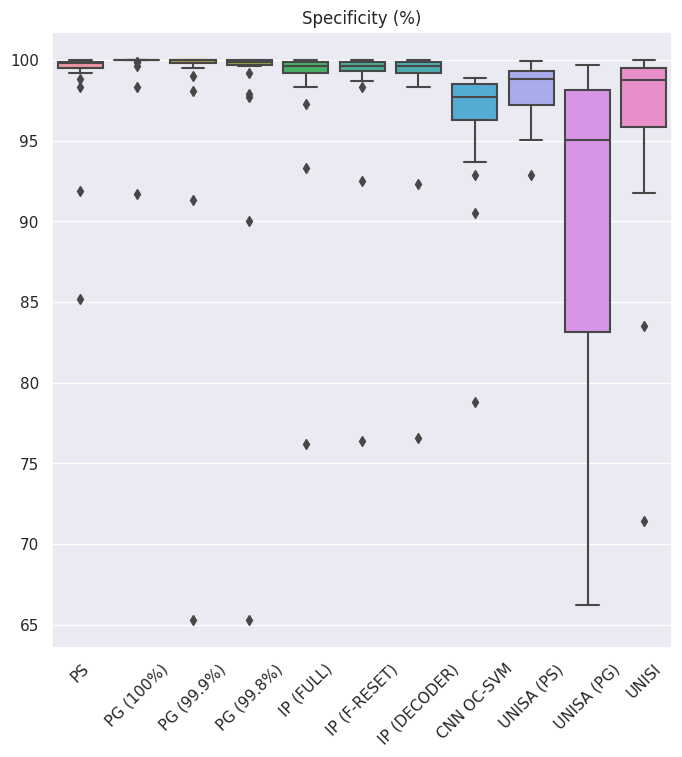

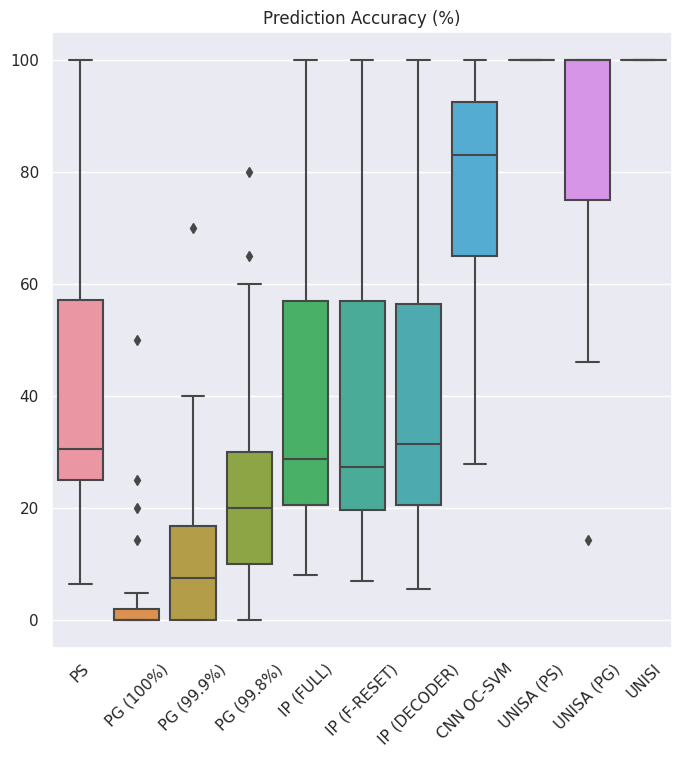

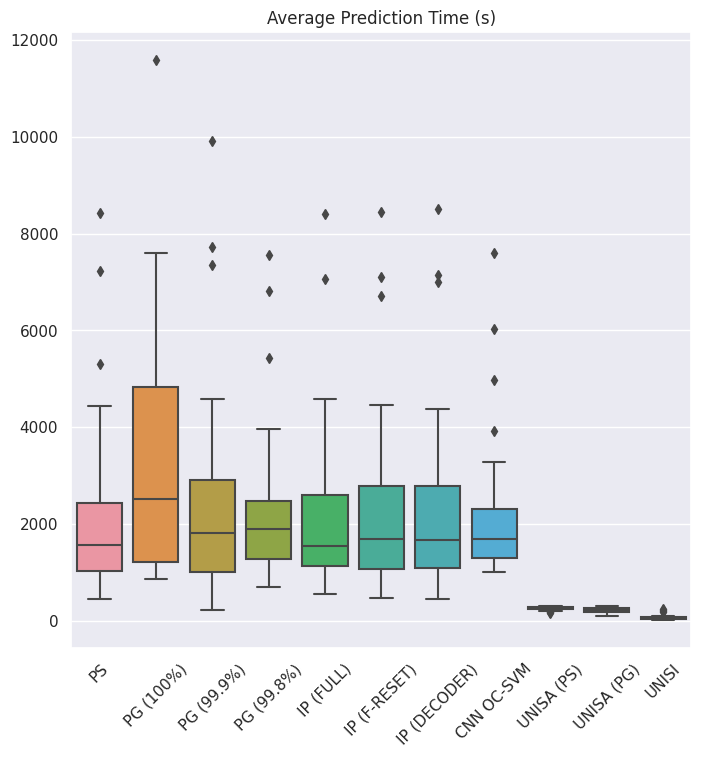

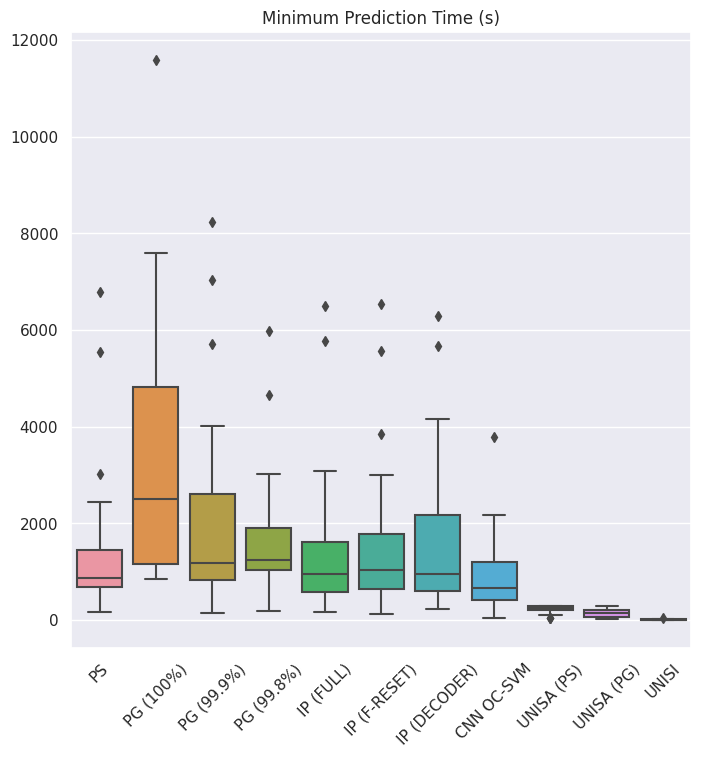

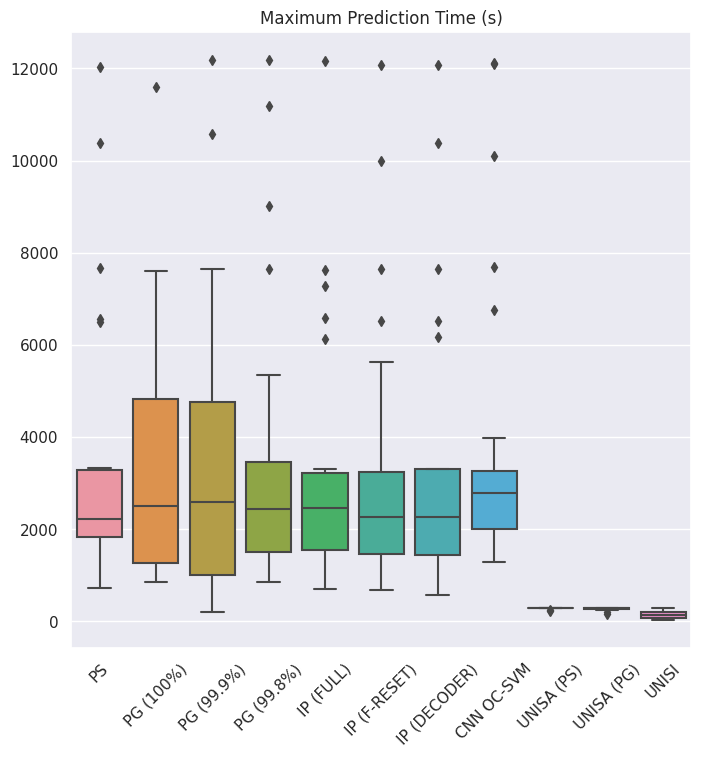

In [6]:
results_dir = "/media/marco741/Archive/Datasets"

path_to_csvs = {"PS": "final/patientspecific/100.0_metrics.csv",
                "PG (100%)": "final/patientgeneric/100.0_metrics.csv",
                "PG (99.9%)": "final/patientgeneric/99.9_metrics.csv",
                "PG (99.8%)": "final/patientgeneric/99.8_metrics.csv",
                "IP (FULL)": "final/full_interpatient/100.0_metrics.csv",
                "IP (F-RESET)": "final/resetoutput_interpatient/100.0_metrics.csv",
                "IP (DECODER)": "final/interpatient/100.0_metrics.csv",
                "CNN OC-SVM": "spectrograms/patientgeneric_balancedvalloss_nocheckstop/metrics.csv",
                "UNISA (PS)": "spectrograms/UNISA_PS.csv",
                "UNISA (PG)": "spectrograms/UNISA_PG.csv",
                "UNISI": "final/UniSi.csv",
}

metric_names = {"spec%": "Specificity (%)", 
                "pred%": "Prediction Accuracy (%)", 
                "APT (s)": "Average Prediction Time (s)", 
                "mPT (s)":"Minimum Prediction Time (s)", 
                "MPT (s)": "Maximum Prediction Time (s)"}

df = {k: pd.DataFrame(columns=list(path_to_csvs.keys())) for k in metric_names.keys()}

for metric in metric_names.keys():
    for col, path in path_to_csvs.items():
        df[metric][col] = pd.read_csv(Path(results_dir)/path)[metric]
        df[metric][col].drop(df[metric][col].tail(1).index, inplace=True)

# sns.boxplot(data=df["spec%"])
for metric, title in metric_names.items():
    plt.figure()
    sns.boxplot(data=df[metric])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.savefig(f"boxplot_{metric}.png", bbox_inches="tight")


